In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
%matplotlib inline

In [2]:
police = pd.read_csv('police.csv')

In [3]:
police.head()

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


In [5]:
police.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   state               91741 non-null  object 
 1   stop_date           91741 non-null  object 
 2   stop_time           91741 non-null  object 
 3   county_name         0 non-null      float64
 4   driver_gender       86536 non-null  object 
 5   driver_race         86539 non-null  object 
 6   violation_raw       86539 non-null  object 
 7   violation           86539 non-null  object 
 8   search_conducted    91741 non-null  bool   
 9   search_type         3307 non-null   object 
 10  stop_outcome        86539 non-null  object 
 11  is_arrested         86539 non-null  object 
 12  stop_duration       86539 non-null  object 
 13  drugs_related_stop  91741 non-null  bool   
 14  district            91741 non-null  object 
dtypes: bool(2), float64(1), object(12)
memory usage: 9.3+

In [4]:
police.isna().sum()

state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64

In [6]:
police.search_type.unique()

array([nan, 'Probable Cause', 'Incident to Arrest',
       'Incident to Arrest,Probable Cause', 'Protective Frisk',
       'Probable Cause,Protective Frisk,Reasonable Suspicion',
       'Reasonable Suspicion', 'Incident to Arrest,Protective Frisk',
       'Inventory,Protective Frisk', 'Inventory',
       'Incident to Arrest,Inventory', 'Inventory,Probable Cause',
       'Protective Frisk,Reasonable Suspicion',
       'Probable Cause,Reasonable Suspicion',
       'Incident to Arrest,Inventory,Protective Frisk',
       'Probable Cause,Protective Frisk',
       'Incident to Arrest,Probable Cause,Protective Frisk',
       'Incident to Arrest,Inventory,Probable Cause',
       'Incident to Arrest,Inventory,Reasonable Suspicion',
       'Incident to Arrest,Reasonable Suspicion',
       'Incident to Arrest,Protective Frisk,Reasonable Suspicion',
       'Inventory,Protective Frisk,Reasonable Suspicion',
       'Incident to Arrest,Probable Cause,Reasonable Suspicion',
       'Inventory,Probable 

In [7]:
police.drop(['county_name','state'],axis=1,inplace=True)

In [8]:
police.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   stop_date           91741 non-null  object
 1   stop_time           91741 non-null  object
 2   driver_gender       86536 non-null  object
 3   driver_race         86539 non-null  object
 4   violation_raw       86539 non-null  object
 5   violation           86539 non-null  object
 6   search_conducted    91741 non-null  bool  
 7   search_type         3307 non-null   object
 8   stop_outcome        86539 non-null  object
 9   is_arrested         86539 non-null  object
 10  stop_duration       86539 non-null  object
 11  drugs_related_stop  91741 non-null  bool  
 12  district            91741 non-null  object
dtypes: bool(2), object(11)
memory usage: 7.9+ MB


In [9]:
police.dropna(subset=['driver_gender'],inplace=True)

In [10]:
police.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86536 entries, 0 to 91740
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   stop_date           86536 non-null  object
 1   stop_time           86536 non-null  object
 2   driver_gender       86536 non-null  object
 3   driver_race         86536 non-null  object
 4   violation_raw       86536 non-null  object
 5   violation           86536 non-null  object
 6   search_conducted    86536 non-null  bool  
 7   search_type         3307 non-null   object
 8   stop_outcome        86536 non-null  object
 9   is_arrested         86536 non-null  object
 10  stop_duration       86536 non-null  object
 11  drugs_related_stop  86536 non-null  bool  
 12  district            86536 non-null  object
dtypes: bool(2), object(11)
memory usage: 8.1+ MB


In [11]:
police.dtypes

stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted        bool
search_type           object
stop_outcome          object
is_arrested           object
stop_duration         object
drugs_related_stop      bool
district              object
dtype: object

In [12]:
police

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,2015-12-31,21:21,F,Black,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone K2
91737,2015-12-31,21:59,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
91738,2015-12-31,22:04,M,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone X3
91739,2015-12-31,22:09,F,Hispanic,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False,Zone K3


In [16]:
police.is_arrested =police.is_arrested.astype('bool')

In [21]:
police

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,2015-12-31,21:21,F,Black,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone K2
91737,2015-12-31,21:59,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
91738,2015-12-31,22:04,M,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone X3
91739,2015-12-31,22:09,F,Hispanic,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False,Zone K3


In [20]:
p

,state_stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI 2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI 2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI 2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI 2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI 2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,RI 2015-12-31,21:21,NaN,F,Black,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone K2
91737,RI 2015-12-31,21:59,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
91738,RI 2015-12-31,22:04,NaN,M,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone X3
91739,RI 2015-12-31,22:09,NaN,F,Hispanic,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False,Zone K3


In [27]:
police['stop_datetime'] = pd.to_datetime(police.stop_date +' ' +police.stop_time)

In [29]:
police.set_index('stop_datetime',inplace=True)

In [30]:
police

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,
2005-01-04 12:55:00,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2005-02-17 04:15:00,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-02-20 17:15:00,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
2005-02-24 01:20:00,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 21:21:00,2015-12-31,21:21,F,Black,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone K2
2015-12-31 21:59:00,2015-12-31,21:59,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2015-12-31 22:04:00,2015-12-31,22:04,M,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone X3


In [31]:
police.loc["May 2015"]

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,
2015-05-01 00:33:00,2015-05-01,00:33,F,Black,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone K2
2015-05-01 00:56:00,2015-05-01,00:56,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,16-30 Min,False,Zone K2
2015-05-01 01:07:00,2015-05-01,01:07,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K2
2015-05-01 02:21:00,2015-05-01,02:21,F,White,Equipment/Inspection Violation,Equipment,False,NaN,N/D,False,0-15 Min,False,Zone X4
2015-05-01 03:13:00,2015-05-01,03:13,M,Black,Equipment/Inspection Violation,Equipment,False,NaN,N/D,False,0-15 Min,False,Zone X4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-05-31 13:47:00,2015-05-31,13:47,M,White,Other Traffic Violation,Moving violation,False,NaN,Arrest Driver,True,0-15 Min,False,Zone X4
2015-05-31 14:24:00,2015-05-31,14:24,M,Black,Registration Violation,Registration/plates,False,NaN,Citation,False,0-15 Min,False,Zone K3
2015-05-31 15:18:00,2015-05-31,15:18,F,Black,Other Traffic Violation,Moving violation,False,NaN,Arrest Driver,True,0-15 Min,False,Zone K3


<AxesSubplot:xlabel='stop_datetime'>

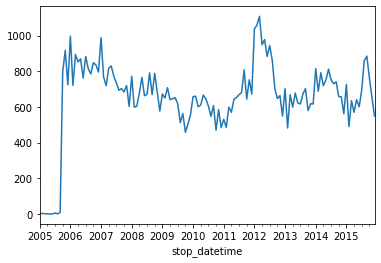

In [36]:
police.resample('M',kind='period').size().plot()

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'White'),
  Text(1, 0, 'Black'),
  Text(2, 0, 'Hispanic'),
  Text(3, 0, 'Asian'),
  Text(4, 0, 'Other')])

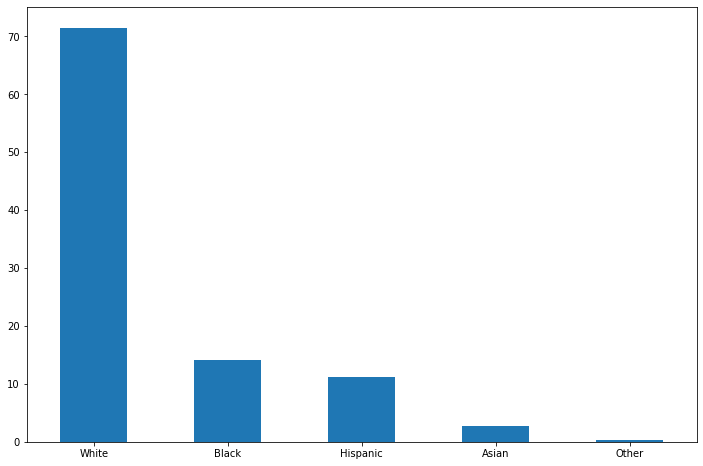

In [42]:
police.driver_race.value_counts(normalize=True).mul(100).plot(kind='bar',figsize=(12,8))
plt.xticks(rotation=0)

In [46]:
police.is_arrested.value_counts(normalize=True)

False    0.964431
True     0.035569
Name: is_arrested, dtype: float64

In [53]:
police.stop_outcome.value_counts(normalize=True)#.plot(kind='pie',figsize=(20,12))

Citation            0.890855
Warning             0.059351
Arrest Driver       0.031605
No Action           0.007211
N/D                 0.007014
Arrest Passenger    0.003964
Name: stop_outcome, dtype: float64

In [54]:
police.driver_race.value_counts()

White       61870
Black       12285
Hispanic     9727
Asian        2389
Other         265
Name: driver_race, dtype: int64

In [64]:
white = police[police.driver_race == 'White']

In [66]:
white_outcomes = white.stop_outcome.value_counts(normalize=True)

In [63]:
white_outcomes

Series([], Name: stop_outcome, dtype: int64)

In [65]:
asian = police[police.driver_race == 'Asian']

In [67]:
asian_outcomes = asian.stop_outcome.value_counts(normalize=True)

<AxesSubplot:>

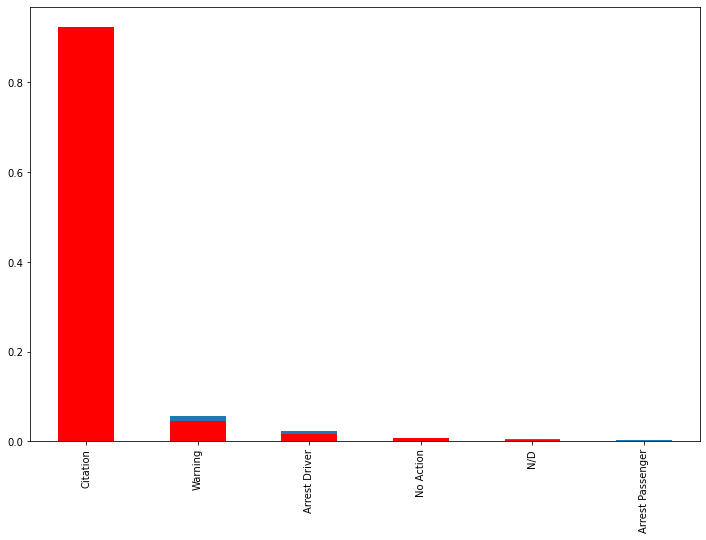

In [71]:
fig,ax = plt.subplots(figsize=(12,8))



In [72]:
asian_or_white = police[police.driver_race.isin(['White','Asian'])]

<AxesSubplot:xlabel='stop_outcome'>

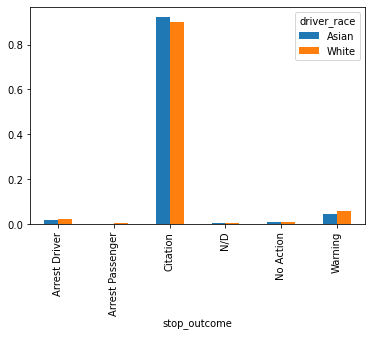

In [79]:
asian_or_white.groupby('driver_race').stop_outcome.value_counts(normalize=True).unstack(level=0).plot(kind='bar')

In [80]:
police.violation.value_counts()

Speeding               48423
Moving violation       16224
Equipment              10921
Other                   4409
Registration/plates     3703
Seat belt               2856
Name: violation, dtype: int64

In [81]:
police.violation.value_counts(normalize=True)

Speeding               0.559571
Moving violation       0.187483
Equipment              0.126202
Other                  0.050950
Registration/plates    0.042791
Seat belt              0.033004
Name: violation, dtype: float64

In [82]:
speeders = police[police.violation == 'Speeding']

In [84]:
speeders

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,
2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2005-02-17 04:15:00,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-02-24 01:20:00,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3
2005-03-14 10:00:00,2005-03-14,10:00,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2005-03-29 21:55:00,2005-03-29,21:55,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 13:23:00,2015-12-31,13:23,M,White,Speeding,Speeding,False,NaN,N/D,False,16-30 Min,False,Zone X1
2015-12-31 18:59:00,2015-12-31,18:59,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K2
2015-12-31 20:20:00,2015-12-31,20:20,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K2


<AxesSubplot:xlabel='stop_outcome'>

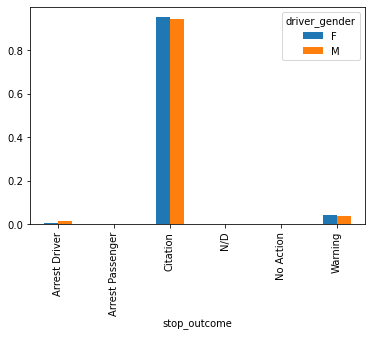

In [88]:
speeders.groupby('driver_gender').stop_outcome.value_counts(normalize=True).unstack(level=0).plot(kind='bar')

In [97]:
group =police.groupby(['violation','driver_gender'],as_index=False).search_conducted.mean()

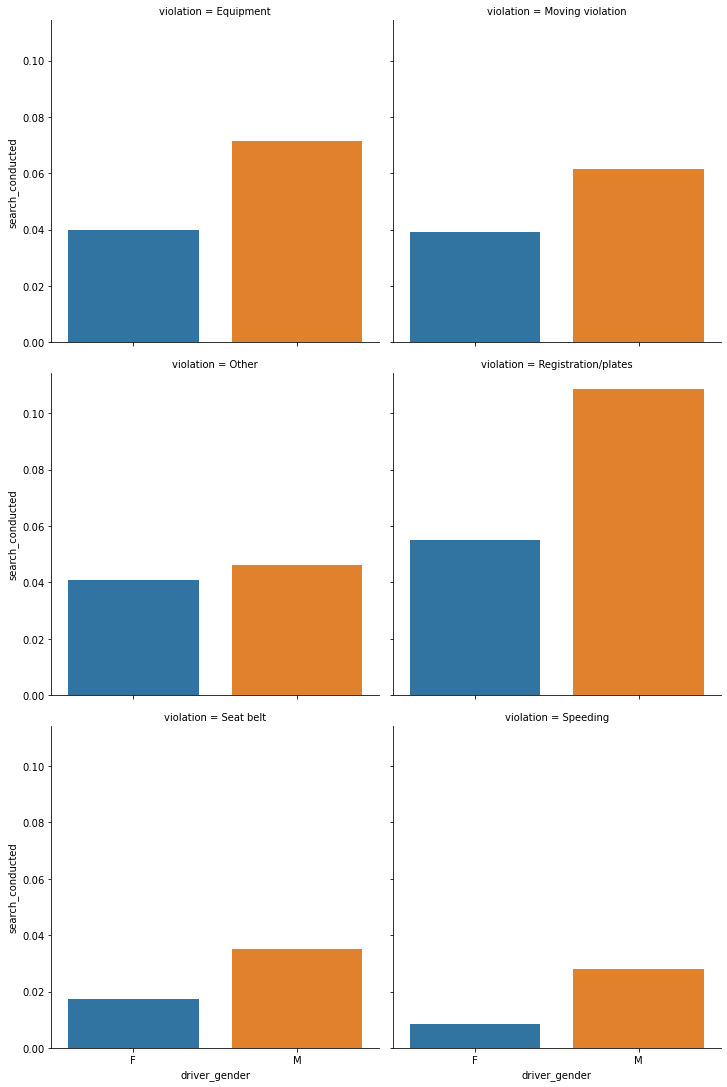

In [98]:
sns.catplot(data=group,x='driver_gender',y='search_conducted',col='violation',col_wrap=2,kind='bar')